In [5]:
# Load stored variables
%store -r final_sales_df

## Are there any seasonal patterns or trends for order volume or revenue?

In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Ensure 'Order Date' is datetime
final_sales_df['Order Date'] = pd.to_datetime(final_sales_df['Order Date'], errors='coerce')

# Extract Year and Quarter
final_sales_df['Year'] = final_sales_df['Order Date'].dt.year
final_sales_df['Quarter'] = final_sales_df['Order Date'].dt.to_period('Q')

# Calculate Revenue: Quantity * Unit Price USD
final_sales_df['Revenue'] = final_sales_df['Quantity'] * final_sales_df['Unit Price USD'].astype(float)

# Aggregate data by Year and Quarter
year_quarter_data = final_sales_df.groupby(['Year', 'Quarter']).agg(
    Distinct_Orders=('Order Number', 'nunique'),
    Total_Revenue=('Revenue', 'sum')
).reset_index()

# Create a complete range of quarters
full_quarters = pd.period_range(start=year_quarter_data['Quarter'].min(), 
                                end=year_quarter_data['Quarter'].max(), freq='Q')

# Expand the dataset to include all quarters
expanded_data = pd.DataFrame({'Quarter': full_quarters})
expanded_data['Year'] = expanded_data['Quarter'].dt.year
year_quarter_data = pd.merge(expanded_data, year_quarter_data, on=['Year', 'Quarter'], how='left')

# Fill missing values with 0
year_quarter_data.fillna({'Distinct_Orders': 0, 'Total_Revenue': 0}, inplace=True)

# Convert Quarter to readable labels for the x-axis
year_quarter_data['Quarter_Label'] = year_quarter_data['Quarter'].dt.strftime('%Y-Q%q')

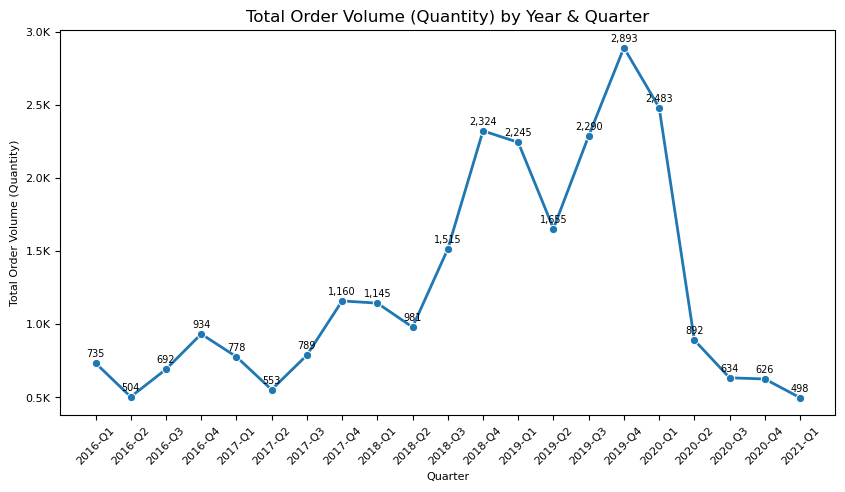

In [143]:
# Plotting Total Order Volume (Quantity)
plt.figure(figsize=(10, 5))

# Plot Total Order Volume (Quantity)
sns.lineplot(data=year_quarter_data, x='Quarter_Label', y='Distinct_Orders', marker='o', linewidth=2)

# Annotate values on the plot in 'K'
for i in range(len(year_quarter_data)):
    plt.text(
        x=i,
        y=year_quarter_data['Distinct_Orders'].max()*0.01+year_quarter_data['Distinct_Orders'].iloc[i],
        s=f"{year_quarter_data['Distinct_Orders'].iloc[i]:,}",
        color='black',
        ha='center',
        va='bottom',
        fontsize=7,
    )

plt.title('Total Order Volume (Quantity) by Year & Quarter', fontsize=12)
plt.xlabel('Quarter', fontsize=8)
plt.ylabel('Total Order Volume (Quantity)', fontsize=8)
plt.yticks(fontsize=8)
plt.xticks(rotation=45, fontsize=8)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x/1000:.1f}K'))

#### Generally, Q4 has the highest number of orders each year, while Q2 has the lowest, except in 2020 when sales declined.

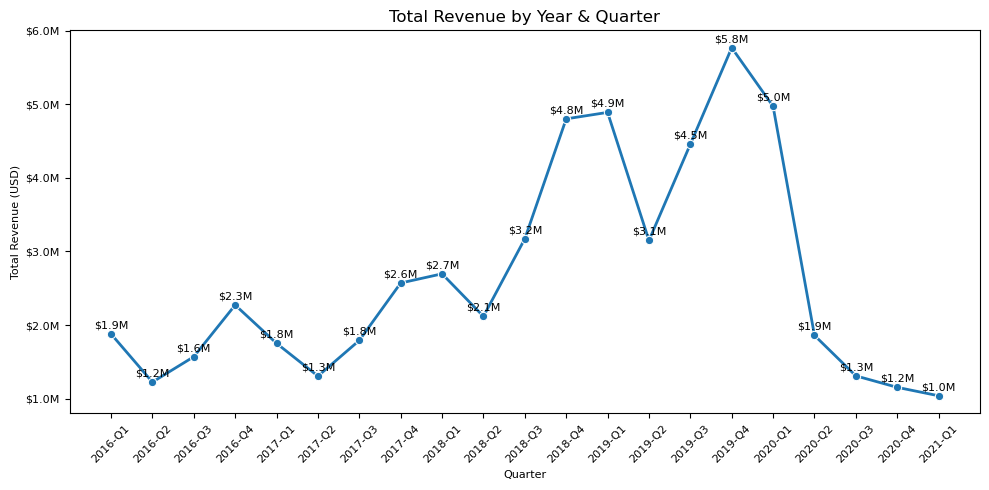

In [115]:
# Plotting Total Revenue by Year & Quarter
plt.figure(figsize=(10, 5))

# Plot Total Revenue by Year & Quarter
sns.lineplot(data=year_quarter_data, x='Quarter_Label', y='Total_Revenue', marker='o', linewidth=2)

# Annotate values on the plot in 'K'
for i in range(len(year_quarter_data)):
    plt.text(
        x=i,
        y=5e4+year_quarter_data['Total_Revenue'].iloc[i],
        s=f"${year_quarter_data['Total_Revenue'].iloc[i] / 1e6:.1f}M",
        color='black',
        ha='center',
        va='bottom',
        fontsize=8,
    )

plt.title('Total Revenue by Year & Quarter', fontsize=12)
plt.xlabel('Quarter', fontsize=8)
plt.ylabel('Total Revenue (USD)', fontsize=8)
plt.xticks(rotation=45,fontsize=8)
plt.yticks(fontsize=8)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'${x/1e6:.1f}M'))

plt.tight_layout()
plt.show()

#### While revenue follows the same pattern as orders purchased, an interesting observation is that Q1 revenue is slightly higher than Q4 of the previous year.